<a href="https://colab.research.google.com/github/zeelShah-12/Retail_Sales_Analysis/blob/main/Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tools & Libraries:

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")


Search for: "Sample Superstore" on Kaggle

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sales-forecasting


List Files in Dataset Folder

In [3]:
import os

# List all files in the directory
dataset_path = '/kaggle/input/sales-forecasting'
os.listdir(dataset_path)


['train.csv']

Load the CSV File

In [4]:
import pandas as pd

df = pd.read_csv(f'{dataset_path}/train.csv')

# View the first few rows
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Basic Info About the Dataset

In [5]:
# Shape of the dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

# Data types and non-null values
df.info()

# Check for missing values
df.isnull().sum()


Dataset has 9800 rows and 18 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Summary Statistics

In [6]:
# Summary statistics for numerical columns
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
# Check unique values in each column
df.nunique()


,0
Row ID,9800
Order ID,4922
Order Date,1230
Ship Date,1326
Ship Mode,4
Customer ID,793
Customer Name,793
Segment,3
Country,1
City,529


In [13]:
# Add a fake 'Profit' column (30% of Sales)
df['Profit'] = df['Sales'] * 0.3


Clean Column Names

In [14]:
# Remove leading/trailing spaces and replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()


,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Profit
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,78.58800
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,219.58200
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4.38600
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,287.27325
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,6.71040


What are the top-selling products?

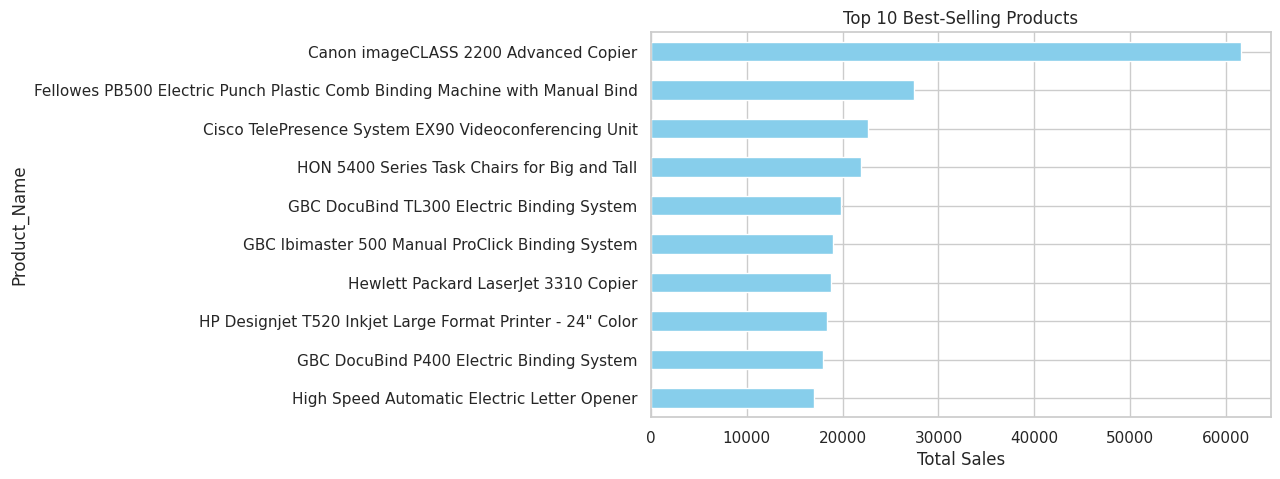

In [11]:
top_products = df.groupby('Product_Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Best-Selling Products', figsize=(8,5), color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Total Sales')
plt.show()


Sales by Region/City/Category?

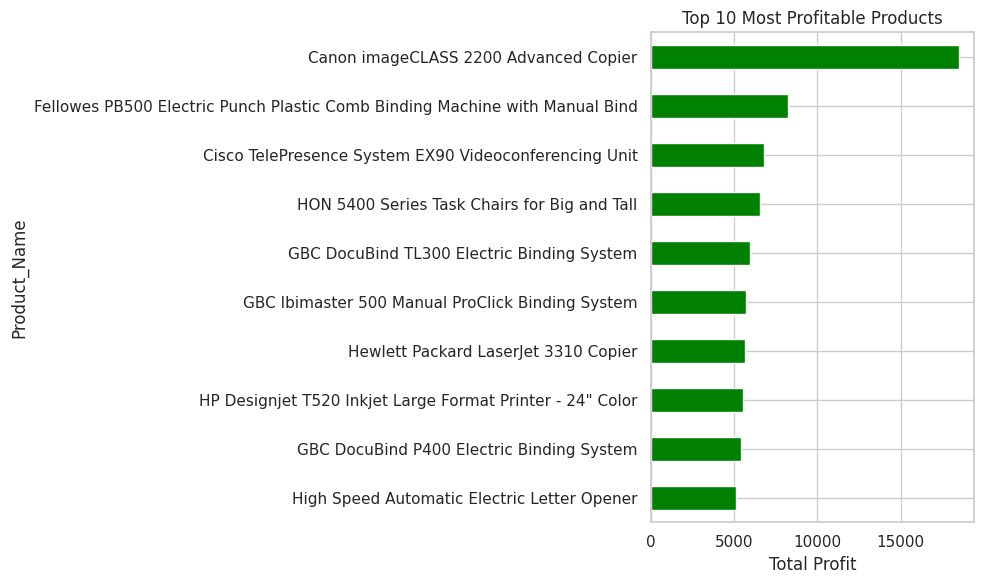

In [15]:
top_profit = df.groupby('Product_Name')['Profit'].sum().sort_values(ascending=False).head(10)
top_profit.plot(kind='barh', title='Top 10 Most Profitable Products', figsize=(10,6), color='green')
plt.gca().invert_yaxis()
plt.xlabel('Total Profit')
plt.tight_layout()
plt.show()


Sales by Category and Sub-Category

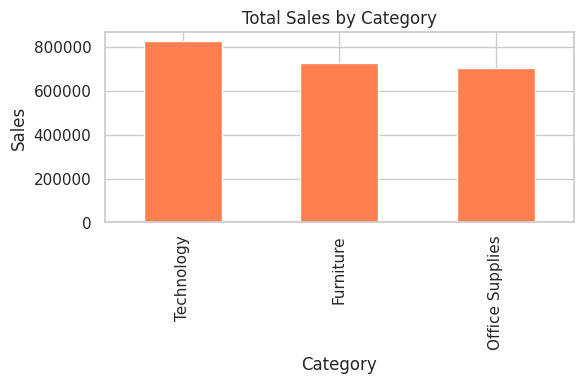

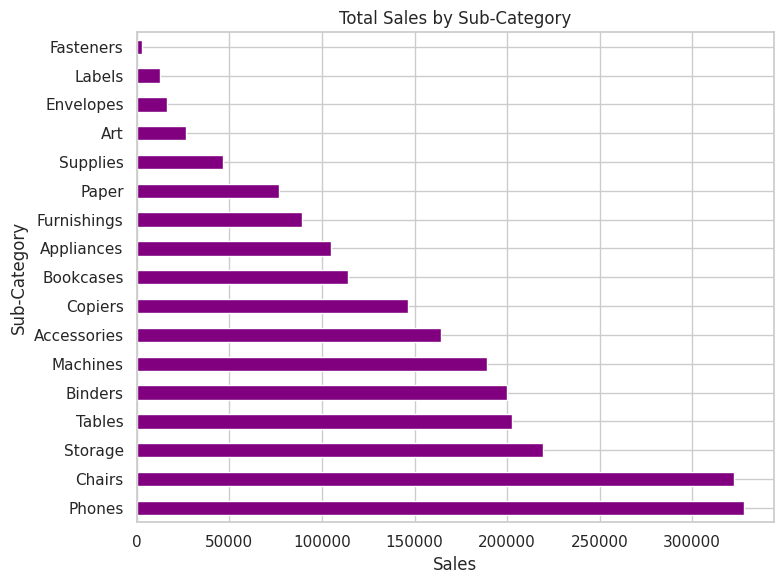

In [16]:
# Sales by Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales.plot(kind='bar', title='Total Sales by Category', color='coral', figsize=(6,4))
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
subcat_sales.plot(kind='barh', title='Total Sales by Sub-Category', color='purple', figsize=(8,6))
plt.xlabel('Sales')
plt.tight_layout()
plt.show()


Sales by Region or State

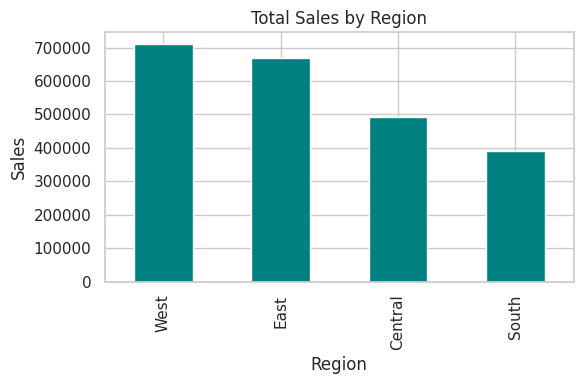

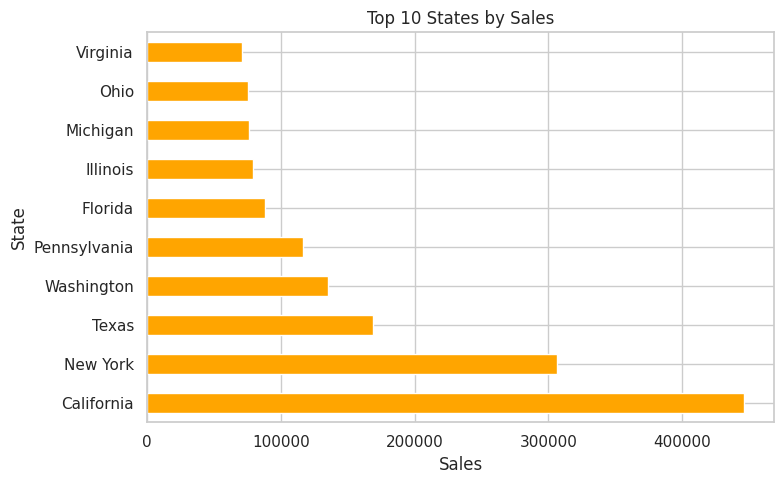

In [17]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total Sales by Region', color='teal', figsize=(6,4))
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Sales by State (Top 10)
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='barh', title='Top 10 States by Sales', color='orange', figsize=(8,5))
plt.xlabel('Sales')
plt.tight_layout()
plt.show()


In [19]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')


Sales Over Time (Monthly Trends)

<ipython-input-20-975865931>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


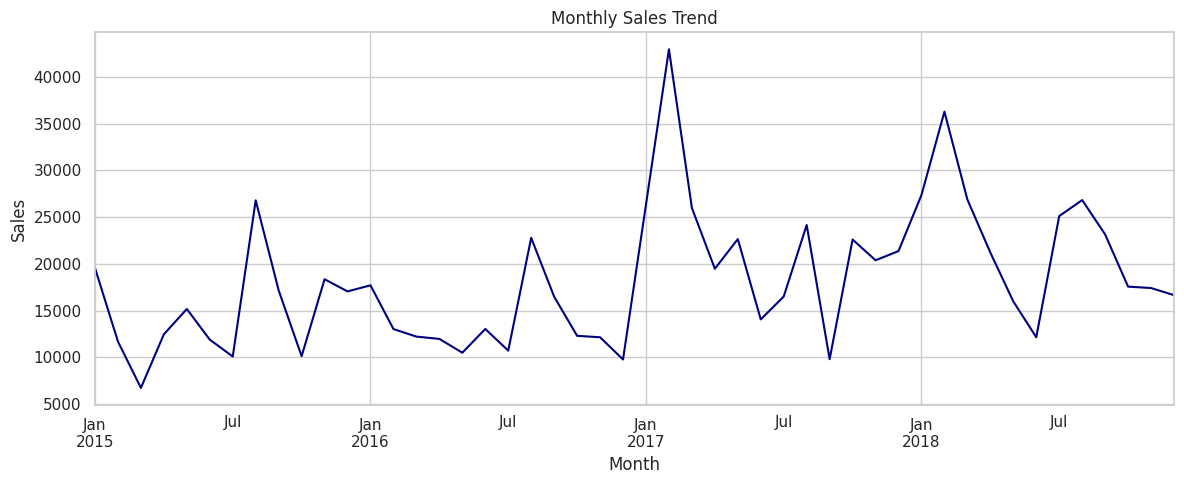

In [20]:
# Convert Order_Date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Set as index (optional)
df.set_index('Order_Date', inplace=True)

# Resample monthly
monthly_sales = df['Sales'].resample('M').sum()

# Plot monthly sales trend
monthly_sales.plot(figsize=(12,5), title='Monthly Sales Trend', color='navy')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


Feature Engineering

In [21]:
# Reset index to make Order_Date a column again (if needed)
df = df.reset_index()

# Create new date-based features
df['Year'] = df['Order_Date'].dt.year
df['Month'] = df['Order_Date'].dt.month
df['Month_Name'] = df['Order_Date'].dt.strftime('%B')
df['Quarter'] = df['Order_Date'].dt.quarter

# Preview
df[['Order_Date', 'Year', 'Month', 'Month_Name', 'Quarter']].head()


,Order_Date,Year,Month,Month_Name,Quarter
0,2017-08-11,2017.0,8.0,August,3.0
1,2017-08-11,2017.0,8.0,August,3.0
2,2017-12-06,2017.0,12.0,December,4.0
3,2016-11-10,2016.0,11.0,November,4.0
4,2016-11-10,2016.0,11.0,November,4.0


Summary Dashboard

In [22]:
print("🧾 Sales Summary Report")
print("- Total Sales:", df['Sales'].sum())
print("- Total Orders:", df['Order_ID'].nunique())
print("- Total Customers:", df['Customer_ID'].nunique())
print("- Best Category:", df.groupby('Category')['Sales'].sum().idxmax())
print("- Best Month:", df.groupby('Month_Name')['Sales'].sum().idxmax())


🧾 Sales Summary Report
- Total Sales: 2261536.7827000003
- Total Orders: 4922
- Total Customers: 793
- Best Category: Technology
- Best Month: February
